In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


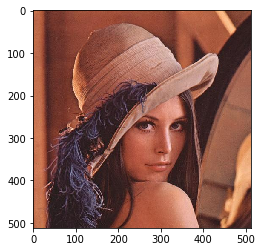

In [3]:
# 均值滤波 3*3  随着核大小逐渐变大，会让图像变得更加模糊

img1 = cv2.imread("lena.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

kernel = np.ones((3,3), np.float32)/8
kernel = -kernel
kernel[0,:]=[1/9,1/9,1/9]
kernel[1,:]=[1/9,1/9,1/9]
kernel[2,:]=[1/9,1/9,1/9]

print(kernel)
plt.imshow(img1) # 原图

(512, 512, 3)
[196 114  76]


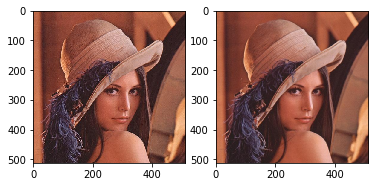

In [7]:
print(img1.shape)
result = cv2.filter2D(img1, -1, kernel)
result.shape
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(result) # 滤波后的图像

(512, 512, 3)
(512, 512, 3)


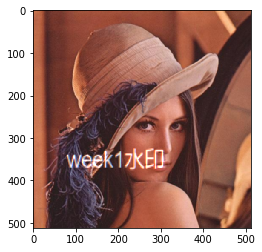

In [8]:
wm = cv2.imread("watermask.png")
wm = cv2.resize(wm, (512,512))
wm = 255 - wm # 变成白色
img2 = cv2.resize(result, (512,512)) # 与水印图片一致
print(wm.shape)
print(img2.shape)
plt.imshow(cv2.add(wm, img2)) # 整合两张图片
plt.imshow(cv2.addWeighted(wm, 1, img2, 1, 0))  # 加水印